## The aim of this notebook is to enhance the r0,r1 and c1 csv Tables 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from src.online_learning.utils import utils

In [10]:
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /mnt/c/Users/Nicola_Petkovic/Documents/dt-rse-davide/ErNESTO-DT/notebooks/online_learning/preprocessing


In [11]:
relative_path_ground = os.path.join('..','..', '..', 'data', 'config', 'params', 'c1_table.csv')
path_ground_c1 = utils.get_absolute_path(relative_path_ground)
df_c1 = pd.read_csv(path_ground_c1)
relative_path_ground = os.path.join('..','..', '..', 'data', 'config', 'params', 'r0_table.csv')
path_ground_r0 = utils.get_absolute_path(relative_path_ground)
df_r0 = pd.read_csv(path_ground_r0)
relative_path_ground = os.path.join('..','..', '..', 'data', 'config', 'params', 'r1_table.csv')
path_ground_r1 = utils.get_absolute_path(relative_path_ground)
df_r1 = pd.read_csv(path_ground_r1)

In [12]:
data_frames= {'r0':df_r0,'r1':df_r1,'c':df_c1}

Assuming the starting dataset is for SoH = 1

In [13]:
for value in data_frames.values():
    value['soh'] = 1

In [14]:
data_frames['r0'].describe()

,temp,soc,r0,soh
count,105.000000,105.000000,105.000000,105.0
mean,20.000000,0.500000,0.003451,1.0
std,14.209964,0.304217,0.001444,0.0
min,0.000000,0.000000,0.001791,1.0
25%,10.000000,0.250000,0.002238,1.0
50%,20.000000,0.500000,0.003036,1.0
75%,30.000000,0.750000,0.004145,1.0
max,40.000000,1.000000,0.006697,1.0


In [15]:
data_frames['r0'].head()

,temp,soc,r0,soh
0,0,0.00,0.006697,1
1,0,0.05,0.005475,1
2,0,0.10,0.005633,1
3,0,0.15,0.005791,1
4,0,0.20,0.005845,1


In [16]:
data_frames['r0'].tail()

,temp,soc,r0,soh
100,40,0.80,0.001812,1
101,40,0.85,0.001809,1
102,40,0.90,0.001803,1
103,40,0.95,0.001797,1
104,40,1.00,0.001791,1


In [17]:
r0 = data_frames['r0']['r0'].values

In [18]:
def enhanceParam(param_array, func):
    xp = np.array([0.6,1])
    x = np.array([0.7,0.8,0.9])
    lists = []
    
    for i in range(len(x)+2):
        lists.append(list)    
    
    lists[0] = func(param_array).tolist()
    lists[4] = param_array.tolist()
    
    tmp1 = []
    tmp2 = []
    tmp3 = []
    for elem in param_array:
        fp = np.array([func(elem),elem])
        y = np.interp(x,xp,fp)
        tmp1.append(y[0])
        tmp2.append(y[1])
        tmp3.append(y[2])    
    
    lists[1] = tmp1
    lists[2] = tmp2
    lists[3] = tmp3
       
    return lists   

In [20]:
halve = lambda x: x/2
double = lambda x: x*2
one_third = lambda x: x/3
r0_enhanced = enhanceParam(r0, double)

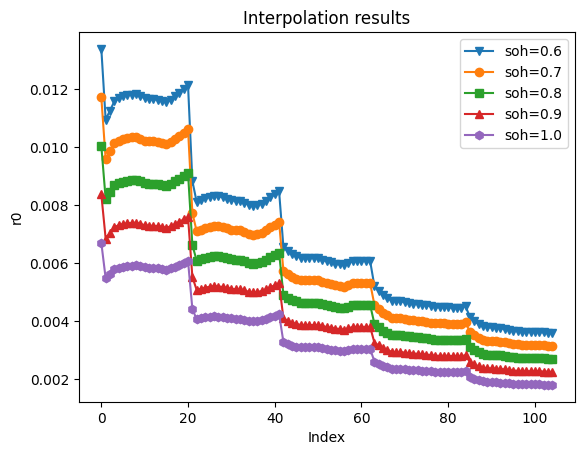

In [21]:
x = range(len(r0_enhanced[0]))
plt.plot(x, r0_enhanced[0], label='soh=0.6', marker='v')
plt.plot(x, r0_enhanced[1], label='soh=0.7', marker='o')
plt.plot(x, r0_enhanced[2], label='soh=0.8', marker='s')
plt.plot(x, r0_enhanced[3], label='soh=0.9', marker='^')
plt.plot(x, r0_enhanced[4], label='soh=1.0', marker='h')

plt.title('Interpolation results')
plt.xlabel('Index')
plt.ylabel('r0')
plt.legend()
plt.show()

In [22]:
r1 = data_frames['r1']['r1'].values
r1_enhanced = enhanceParam(r1,double)

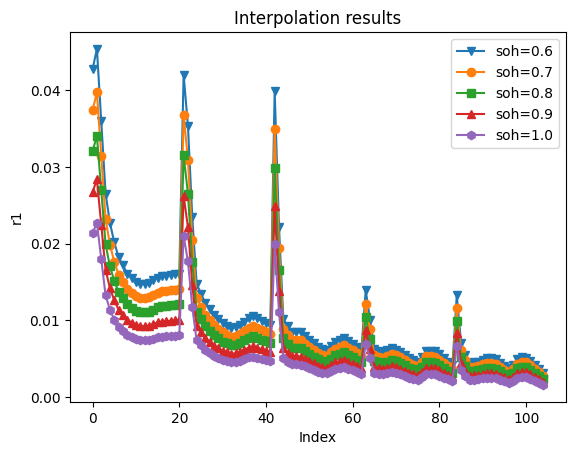

In [23]:
x = range(len(r1_enhanced[0]))
plt.plot(x, r1_enhanced[0], label='soh=0.6', marker='v')
plt.plot(x, r1_enhanced[1], label='soh=0.7', marker='o')
plt.plot(x, r1_enhanced[2], label='soh=0.8', marker='s')
plt.plot(x, r1_enhanced[3], label='soh=0.9', marker='^')
plt.plot(x, r1_enhanced[4], label='soh=1.0', marker='h')

plt.title('Interpolation results')
plt.xlabel('Index')
plt.ylabel('r1')
plt.legend()
plt.show()

In [24]:
c = data_frames['c']['c'].values

In [28]:
c_enhanced = enhanceParam(c,one_third)

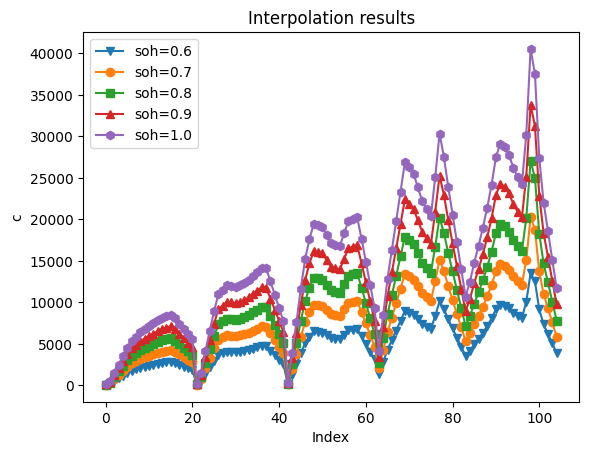

In [29]:
x = range(len(c_enhanced[0]))
plt.plot(x, c_enhanced[0], label='soh=0.6', marker='v')
plt.plot(x, c_enhanced[1], label='soh=0.7', marker='o')
plt.plot(x, c_enhanced[2], label='soh=0.8', marker='s')
plt.plot(x, c_enhanced[3], label='soh=0.9', marker='^')
plt.plot(x, c_enhanced[4], label='soh=1.0', marker='h')

plt.title('Interpolation results')
plt.xlabel('Index')
plt.ylabel('c')
plt.legend()
plt.show()

In [30]:
def updateDf(df, listsToAdd, col ):
    tmp = []
    soh = [0.6, 0.7, 0.8, 0.9]
    for i in range(len(listsToAdd)):
        df_new = df.copy()
        df_new[col] = listsToAdd[i]
        df_new['soh'] = soh[i]
        tmp.append(df_new)
    
    reversed_list_of_dfs = tmp[::-1]
    stacked_df = pd.concat([df] + reversed_list_of_dfs, axis=0).reset_index(drop=True) 
    
    return stacked_df

In [31]:
data_frames['r0']

,temp,soc,r0,soh
0,0,0.00,0.006697,1
1,0,0.05,0.005475,1
2,0,0.10,0.005633,1
3,0,0.15,0.005791,1
4,0,0.20,0.005845,1
...,...,...,...,...
100,40,0.80,0.001812,1
101,40,0.85,0.001809,1
102,40,0.90,0.001803,1
103,40,0.95,0.001797,1


In [32]:
r0_final_df = updateDf(data_frames['r0'],r0_enhanced[0:3+1], col='r0')
r1_final_df = updateDf(data_frames['r1'],r1_enhanced[0:3+1], col='r1')
c_final_df = updateDf(data_frames['c'],c_enhanced[0:3+1], col='c')

In [33]:
r0_final_df.describe()

,temp,soc,r0,soh
count,525.000000,525.000000,525.000000,525.000000
mean,20.000000,0.500000,0.005177,0.800000
std,14.155624,0.303054,0.002531,0.141556
min,0.000000,0.000000,0.001791,0.600000
25%,10.000000,0.250000,0.003202,0.700000
50%,20.000000,0.500000,0.004513,0.800000
75%,30.000000,0.750000,0.006299,0.900000
max,40.000000,1.000000,0.013393,1.000000


In [34]:
r0_final_df.head(300)

,temp,soc,r0,soh
0,0,0.00,0.006697,1.0
1,0,0.05,0.005475,1.0
2,0,0.10,0.005633,1.0
3,0,0.15,0.005791,1.0
4,0,0.20,0.005845,1.0
...,...,...,...,...
295,40,0.05,0.003105,0.8
296,40,0.10,0.003003,0.8
297,40,0.15,0.002919,0.8
298,40,0.20,0.002870,0.8


In [35]:
c_final_df.head(300)

,temp,soc,c,soh
0,0,0.00,149.512479,1.0
1,0,0.05,477.073388,1.0
2,0,0.10,1489.964003,1.0
3,0,0.15,2502.854617,1.0
4,0,0.20,3516.885817,1.0
...,...,...,...,...
295,40,0.05,9852.220895,0.8
296,40,0.10,11219.082363,0.8
297,40,0.15,12668.769532,0.8
298,40,0.20,14277.665588,0.8


In [36]:
c_final_df.tail()

,temp,soc,c,soh
520,40,0.80,9148.061901,0.6
521,40,0.85,7344.853516,0.6
522,40,0.90,6197.644989,0.6
523,40,0.95,5050.436462,0.6
524,40,1.00,3903.227934,0.6


In [144]:
r0_final_df.to_csv('r0_enhanced_table.csv', index=False)
r1_final_df.to_csv('r1_enhanced_table.csv', index=False)

In [37]:
c_final_df.to_csv('c_enhanced_table.csv', index=False)